In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
df=pd.read_csv('UMTMVS.csv')

In [3]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [5]:
df=pd.read_csv('UMTMVS.csv', index_col='DATE')
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [6]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
       '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01'],
      dtype='object', name='DATE', length=347)

In [7]:
df.index=pd.to_datetime(df.index)

In [8]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='DATE', length=347, freq=None)

# indexing 

In [9]:
df.loc['2000-01-01': '2015-01-01']

,UMTMVS
DATE,
2000-01-01,314656.0
2000-02-01,342744.0
2000-03-01,374859.0
2000-04-01,344093.0
2000-05-01,356402.0
...,...
2014-09-01,512979.0
2014-10-01,505469.0
2014-11-01,458120.0


To get data for all first months for every year , we use step function 

In [10]:
df.loc['2000-01-01': '2015-01-01':12]

,UMTMVS
DATE,
2000-01-01,314656.0
2001-01-01,313393.0
2002-01-01,294008.0
2003-01-01,305102.0
2004-01-01,311470.0
2005-01-01,346845.0
2006-01-01,380278.0
2007-01-01,388574.0
2008-01-01,432307.0


Time resampling is similar to group by

M - month end , a - year end , ms - month start , as - year start 

calculating mean value at start of every year 

In [11]:
df.resample(rule='AS').mean().head()

,UMTMVS
DATE,
1992-01-01,242002.000000
1993-01-01,251708.083333
1994-01-01,269842.666667
1995-01-01,289973.083333
1996-01-01,299765.666667


using custom fucntion

In [12]:
def sum_year(year_val):
  return year_val.sum()

In [13]:
df.resample(rule='AS').apply(sum_year)

,UMTMVS
DATE,
1992-01-01,2904024.0
1993-01-01,3020497.0
1994-01-01,3238112.0
1995-01-01,3479677.0
1996-01-01,3597188.0
1997-01-01,3834699.0
1998-01-01,3899813.0
1999-01-01,4031887.0
2000-01-01,4208584.0


In [14]:
df.resample(rule='AS').apply(sum_year)== df.resample(rule='AS').sum()

,UMTMVS
DATE,
1992-01-01,True
1993-01-01,True
1994-01-01,True
1995-01-01,True
1996-01-01,True
1997-01-01,True
1998-01-01,True
1999-01-01,True
2000-01-01,True


using rolling wiondow 

In [18]:
df.rolling(window=30).max()[30:].head(10)

,UMTMVS
DATE,
1994-07-01,287336.0
1994-08-01,287336.0
1994-09-01,291357.0
1994-10-01,291357.0
1994-11-01,291357.0
1994-12-01,291357.0
1995-01-01,291357.0
1995-02-01,291357.0
1995-03-01,303201.0


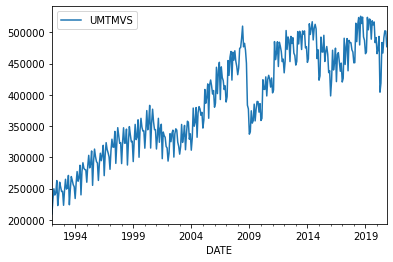

In [20]:
df.plot()

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Time Series')]

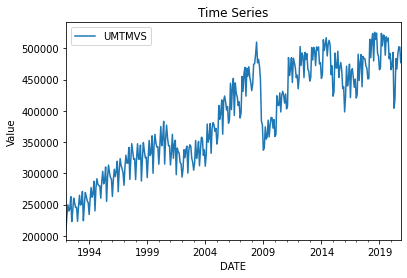

In [21]:
ax=df.plot()
ax.set(title='Time Series', ylabel='Value')

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Time Series')]

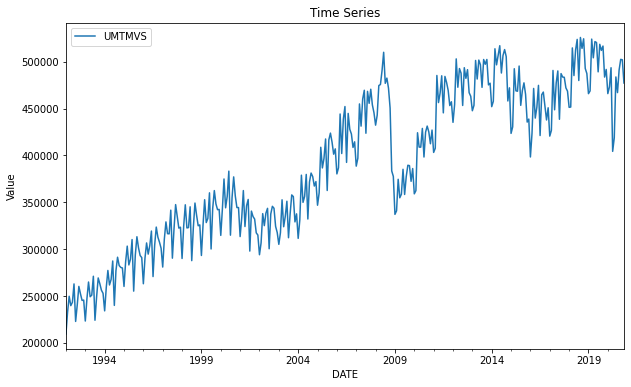

In [22]:
ax=df.plot(figsize=(10,6))
ax.set(title='Time Series', ylabel='Value')

Plotting mean of starting value 

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Time Series')]

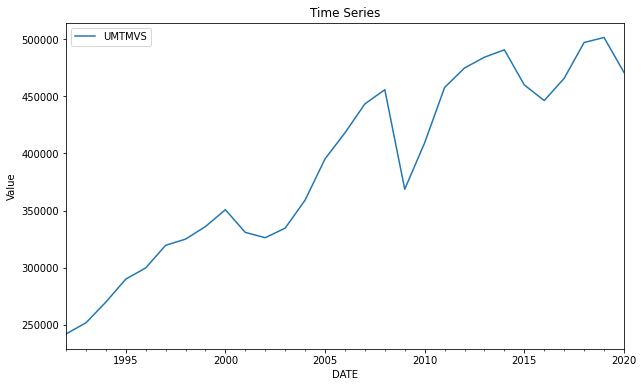

In [24]:
ax=df.resample(rule='AS').mean().plot(figsize=(10,6))
ax.set(title='Time Series', ylabel='Value')

Plotting the bar 

[Text(0, 0.5, 'Value'), Text(0.5, 1.0, 'Time Series')]

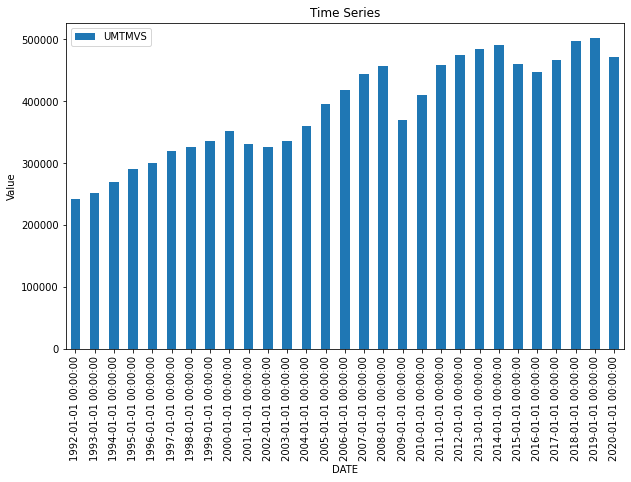

In [25]:
ax=df.resample(rule='AS').mean().plot.bar(figsize=(10,6))
ax.set(title='Time Series', ylabel='Value')

Plotting normal mean and rolling mean 

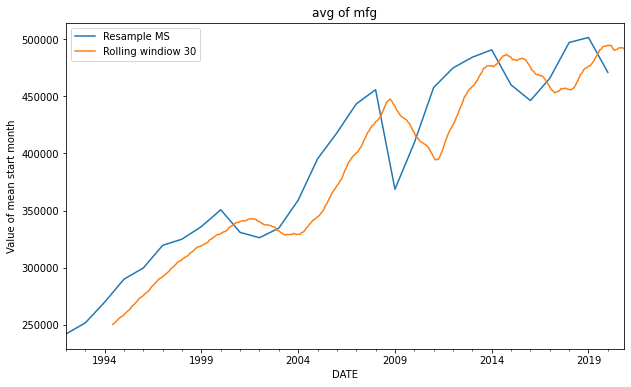

In [26]:
ax=df['UMTMVS'].resample(rule='AS').mean().plot(figsize=(10,6), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['UMTMVS'].plot(label='Rolling windiow 30')
ax.set(ylabel='Value of mean start month', title='avg of mfg')
ax.legend()

We can plot for specific days for eg max values between 2 rtanges 

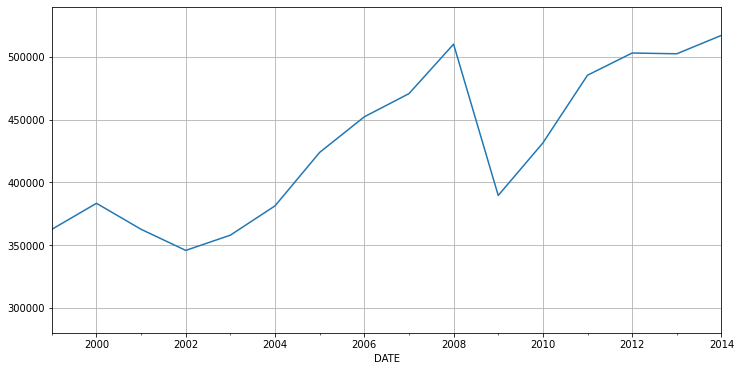

In [28]:
ax=df['UMTMVS'].resample(rule='AS').max().plot(xlim=['1999-01-01','2014-01-01'], ylim=[280000,540000], figsize=(12,6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)